# 📝 Pattern Recognition & Biometrics. TP Apprentissage profond ou *Deep Learning*

### Binôme: CHEAM Richard & NOUV Ratanakmuny

Dans ce travail pratique, nous verrons l'intérêt des modèles d'apprentissage profond (*Deep Learning*) en les comparant à des modèles de *Machine Learning* classiques (non profonds).  

Nous voudrons identifier les animaux et les objets à partir des images de la base de données CIFAR 10 (https://www.cs.toronto.edu/%7Ekriz/cifar.html). 

Commençons par charger les données...


In [61]:
import tensorflow as tf

from tensorflow import keras
from keras import datasets
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten

(data_train, target_train), (data_test, target_test) = tf.keras.datasets.cifar10.load_data()

A manière d'exemple, nous afficherons 3 images de chaque classe :

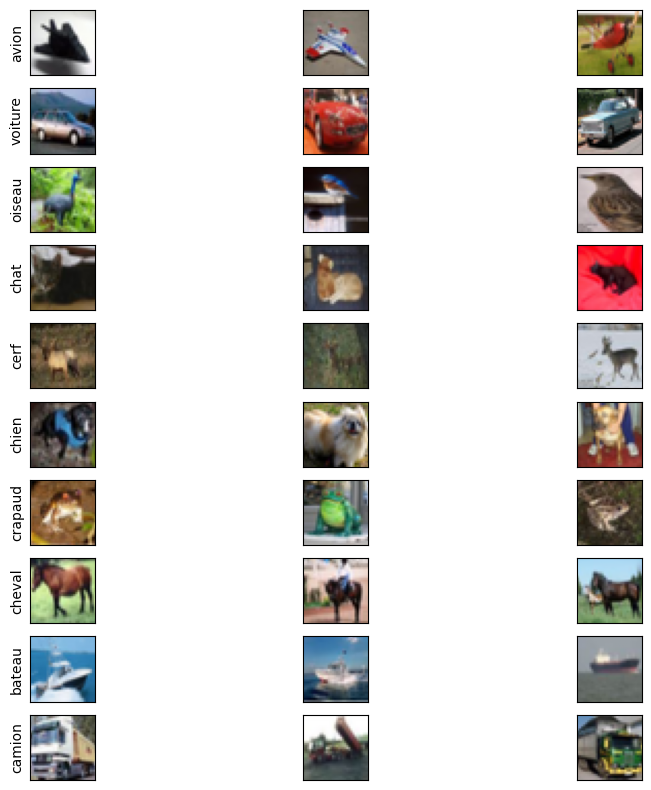

In [2]:
import matplotlib.pyplot as plt
import numpy as np
classes = ['avion', 'voiture', 'oiseau', 'chat', 'cerf', 
            'chien', 'crapaud', 'cheval', 'bateau', 'camion']

# Normalisation des valeurs des pixels entre 0 and 1
data_train, data_test = data_train / 255.0, data_test / 255.0

n_images = 3

plt.figure(figsize=(10,10))
for i in range(len(classes)):
  idx = np.where(target_train == i)
  #print(idx)
  for j in range(n_images): 
    plt.subplot(len(classes),n_images,n_images*i+j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_train[idx[0][j]])
    if j == 0:
        plt.ylabel(classes[target_train[idx[0][j]][0]])
plt.show()


## Partie I. *Feedforward Neural Network* à une seule couche cachée

Nous construisons un réseau de neurones avec $N_{H_l} = 1$ couche cachée et $m=32$ neurones dans la couche cachée. 

* I.1) Si on considère les images "brutes", quelle est la dimension de la "couche" d'entrée ?
* I.2) Quelle est la performance du modèle sur les ensembles d'apprentissage et de test ?

In [3]:
m=32
refmodel = tf.keras.Sequential()
refmodel.add(Flatten(input_shape=data_train[0].shape)) #flatten image into a 1D array of size 3072
refmodel.add(Dense(m, activation='sigmoid')) #hidden layer 
refmodel.add(Dense(len(classes))) #output layer

refmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history1 = refmodel.fit(data_train, target_train, epochs=20, 
                        validation_data=(data_test, target_test), batch_size=64)

Epoch 1/20
782/782 [==============================] - 3s 3ms/step - loss: 1.9455 - accuracy: 0.3088 - val_loss: 1.8290 - val_accuracy: 0.3641
Epoch 2/20
782/782 [==============================] - 2s 3ms/step - loss: 1.7983 - accuracy: 0.3672 - val_loss: 1.7609 - val_accuracy: 0.3855
Epoch 3/20
782/782 [==============================] - 2s 3ms/step - loss: 1.7513 - accuracy: 0.3825 - val_loss: 1.7347 - val_accuracy: 0.3843
Epoch 4/20
782/782 [==============================] - 2s 3ms/step - loss: 1.7102 - accuracy: 0.3958 - val_loss: 1.7561 - val_accuracy: 0.3744
Epoch 5/20
782/782 [==============================] - 2s 3ms/step - loss: 1.6788 - accuracy: 0.4102 - val_loss: 1.6823 - val_accuracy: 0.4040
Epoch 6/20
782/782 [==============================] - 3s 3ms/step - loss: 1.6571 - accuracy: 0.4166 - val_loss: 1.6672 - val_accuracy: 0.4087
Epoch 7/20
782/782 [==============================] - 3s 3ms/step - loss: 1.6418 - accuracy: 0.4195 - val_loss: 1.6556 - val_accuracy: 0.4129
Epoch 

## Response:

* I.1) If we consider "raw" images, the dimension of the input layer is $\textbf{Width x Height x RGB}$. Hence, we would have $32*32*3 = 3072$ as the size of input layer.

* I.2) Performance of the model on training and testing set:

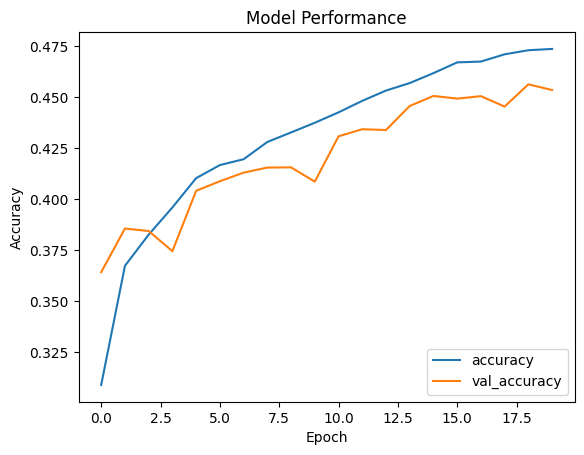

In [4]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Performance')
plt.legend(loc='lower right')

In [5]:
print("The loss on training set:", np.mean(history1.history['loss']))
print("The accuracy on training set:", np.mean(history1.history['accuracy']))
print("The loss on testing set:", np.mean(history1.history['val_loss']))
print("The accuracy on testing set:", np.mean(history1.history['val_accuracy']))

The loss on training set: 1.610065072774887
The accuracy on training set: 0.43062699735164645
The loss on testing set: 1.6382316052913666
The accuracy on testing set: 0.42113000005483625


In [6]:
train_perf = refmodel.evaluate(data_train, target_train)
test_perf = refmodel.evaluate(data_test, target_test)
print("The loss on training set:", train_perf[0])
print("The accuracy on training set:", train_perf[1])
print("The loss on testing set:", test_perf[0])
print("The accuracy on testing set:", test_perf[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.5469 - accuracy: 0.4534
The loss on training set: 1.4497506618499756
The accuracy on training set: 0.4850800037384033
The loss on testing set: 1.54694402217865
The accuracy on testing set: 0.45339998602867126


Optimisez le nombre de neurones dans la couche cachée dans l'intervalle $m = \left[2,128\right]$
* I.3) Quelle est la valeur optimale de $ m $ ?
* I.4) Quelles sont les nouvelles performances en apprentissage et en test ?

In [7]:
#Ecrivez votre code ici

# initialize range of m to test
m_range = np.arange(2, 129) #until 128

# initialize list to store performance of each m
train_acc = []
train_loss = []
test_acc = []
test_loss = []

# loop to store the performance each time but only take first 15 values to avoid long running time
for m_ in m_range[:10]: #take 15 values
    refmodel = tf.keras.Sequential()
    refmodel.add(Flatten(input_shape=data_train[0].shape))
    refmodel.add(Dense(m_, activation='sigmoid'))
    refmodel.add(Dense(len(classes)))
    refmodel.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    history1 = refmodel.fit(data_train, target_train, epochs=20, 
                            validation_data=(data_test, target_test), batch_size=64)
    #calculate accuracy and loss for each m
    #when conducting hyperparameter tuning using mean() on the history object offers more flexibility and control over the training process
    train_acc.append(np.mean(history1.history['accuracy']))
    train_loss.append(np.mean(history1.history['loss']))
    test_acc.append(np.mean(history1.history['val_accuracy']))
    test_loss.append(np.mean(history1.history['val_loss']))

Epoch 1/20
782/782 [==============================] - 2s 3ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.0962
Epoch 2/20
782/782 [==============================] - 2s 3ms/step - loss: 2.3027 - accuracy: 0.0968 - val_loss: 2.2964 - val_accuracy: 0.1240
Epoch 3/20
782/782 [==============================] - 2s 3ms/step - loss: 2.2186 - accuracy: 0.1539 - val_loss: 2.1609 - val_accuracy: 0.1617
Epoch 4/20
782/782 [==============================] - 2s 3ms/step - loss: 2.1311 - accuracy: 0.1650 - val_loss: 2.1072 - val_accuracy: 0.1624
Epoch 5/20
782/782 [==============================] - 2s 3ms/step - loss: 2.0984 - accuracy: 0.1673 - val_loss: 2.0926 - val_accuracy: 0.1783
Epoch 6/20
782/782 [==============================] - 2s 3ms/step - loss: 2.0821 - accuracy: 0.1766 - val_loss: 2.0899 - val_accuracy: 0.1694
Epoch 7/20
782/782 [==============================] - 2s 3ms/step - loss: 2.0716 - accuracy: 0.1780 - val_loss: 2.0669 - val_accuracy: 0.1801
Epoch 

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

**My GPU doesn't have enough memory**

## Reponse:

* I.3) Find optimal value of number of neurons $m$ in hidden layer:

In [8]:
indx = np.argmax(train_acc) # index will be the same for test_acc and np.argmin(train_loss|test_loss)
m_opt = m_range[indx]
print("Optimal m:", m_opt)

Optimal m: 10


* I.4) Model's performance on training and testing set using optimal $m$:

In [9]:
refmodel = tf.keras.Sequential()
refmodel.add(Flatten(input_shape=data_train[0].shape))
refmodel.add(Dense(m_opt, activation='sigmoid')) # replaced m by m_opt
refmodel.add(Dense(len(classes)))

refmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history1 = refmodel.fit(data_train, target_train, epochs=20, 
                        validation_data=(data_test, target_test), batch_size=64)

Epoch 1/20
782/782 [==============================] - 3s 3ms/step - loss: 2.0702 - accuracy: 0.2604 - val_loss: 1.9280 - val_accuracy: 0.3251
Epoch 2/20
782/782 [==============================] - 2s 3ms/step - loss: 1.8967 - accuracy: 0.3309 - val_loss: 1.8508 - val_accuracy: 0.3494
Epoch 3/20
782/782 [==============================] - 2s 3ms/step - loss: 1.8308 - accuracy: 0.3531 - val_loss: 1.8344 - val_accuracy: 0.3575
Epoch 4/20
782/782 [==============================] - 2s 3ms/step - loss: 1.7968 - accuracy: 0.3632 - val_loss: 1.8045 - val_accuracy: 0.3564
Epoch 5/20
782/782 [==============================] - 2s 3ms/step - loss: 1.7699 - accuracy: 0.3726 - val_loss: 1.7683 - val_accuracy: 0.3750
Epoch 6/20
782/782 [==============================] - 2s 3ms/step - loss: 1.7565 - accuracy: 0.3745 - val_loss: 1.7857 - val_accuracy: 0.3606
Epoch 7/20
782/782 [==============================] - 2s 3ms/step - loss: 1.7458 - accuracy: 0.3781 - val_loss: 1.7759 - val_accuracy: 0.3741
Epoch 

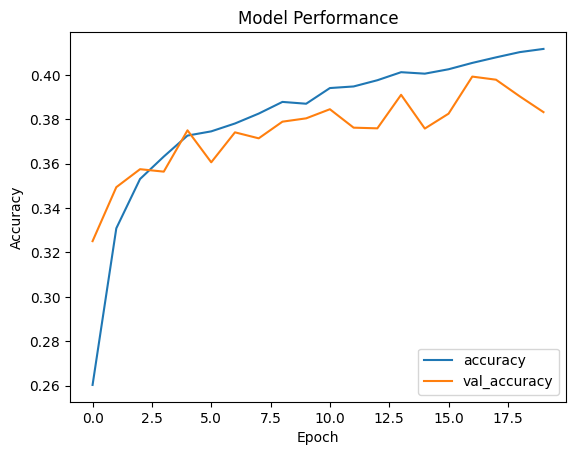

In [10]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Performance')
plt.legend(loc='lower right')

In [11]:
train_perf = refmodel.evaluate(data_train, target_train)
test_perf = refmodel.evaluate(data_test, target_test)

fnn_simple_acc = train_perf[1]
fnn_simple_val_acc = test_perf[1]

print("The loss on training set:", train_perf[0])
print("The accuracy on training set:", train_perf[1])
print("The loss on testing set:", test_perf[0])
print("The accuracy on testing set:", test_perf[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.7288 - accuracy: 0.3832
The loss on training set: 1.6709556579589844
The accuracy on training set: 0.4035800099372864
The loss on testing set: 1.7288172245025635
The accuracy on testing set: 0.3831999897956848


Montrez la matrice de confusion du modèle optimal sur l'ensemble de test

* I.4) Quelle est la prédiction "préférée" du modèle ?
* I.5) Quelle est la classe la mieux prédite ? Justifiez brièvement

313/313 [==============================] - 1s 2ms/step


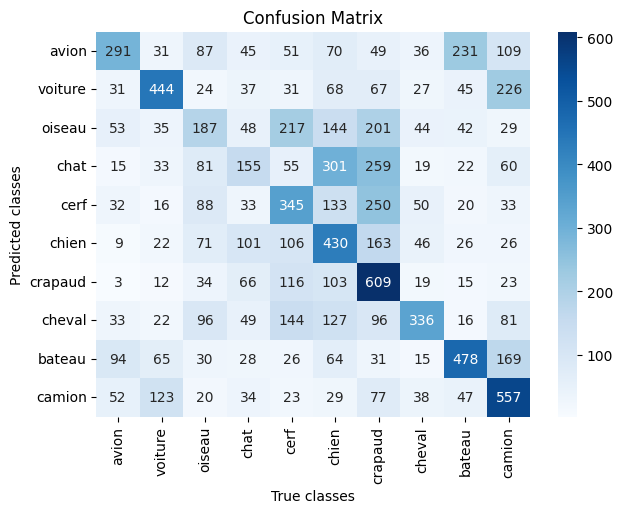

In [12]:
#Ecrivez votre code ici
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#predictions on test set
pred = np.argmax(refmodel.predict(data_test), axis=1)

conf_matrix = confusion_matrix(target_test, pred)

#plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.ylabel('Predicted classes')
plt.xlabel('True classes')
plt.title('Confusion Matrix')
plt.show()

* I.4) Mathematically speaking, the preferred prediction of the model is the class which has the highest value of row sum in the confusion matrix above.

In [13]:
indx_prefer = np.argmax(np.sum(conf_matrix, axis=0))
preferred_pred = classes[indx_prefer]
print("The preferred prediction of the model:", preferred_pred)

The preferred prediction of the model: crapaud


* I.5) The best predicted class is the label with the highest value alongside the diagonal in confusion matrix.

In [14]:
indx_best = np.argmax(np.diag(conf_matrix))
best_pred_class = classes[indx_best]
print("The best predicted class:", best_pred_class)

The best predicted class: crapaud


## Partie II. *Feedforward Neural Networks* à plusieurs couches

Construisez et entraînez un réseau de neurones type Perceptron Multicouche (PMC) à $N_{H_l} = 3$ couches cachées et avec $m_1=32, m_2=16, m_3 = 16$ neurones respectivement pour les couches cachées 1, 2 et 3.

* II.1) Combien de paramètres sont-ils optimisés au total ? 
* II.2) Quelle est la performance en apprentissage et validation ?
* II.3) Montrez la matrice de confusion

In [15]:
#Ecrivez votre code ici
m1 = 32
m2 = 16
m3 = 16
fnn_refmodel = tf.keras.Sequential()
#input layer
fnn_refmodel.add(Flatten(input_shape=data_train[0].shape))
#add 3 hidden layers
fnn_refmodel.add(Dense(m1, activation='sigmoid'))
fnn_refmodel.add(Dense(m2, activation='sigmoid'))
fnn_refmodel.add(Dense(m3, activation='sigmoid'))
#output layer
fnn_refmodel.add(Dense(len(classes)))

fnn_refmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history1 = fnn_refmodel.fit(data_train, target_train, epochs=20, 
                        validation_data=(data_test, target_test), batch_size=64)

Epoch 1/20
782/782 [==============================] - 3s 4ms/step - loss: 2.1743 - accuracy: 0.1967 - val_loss: 2.0417 - val_accuracy: 0.2401
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 1.9908 - accuracy: 0.2557 - val_loss: 1.9623 - val_accuracy: 0.2625
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 1.9307 - accuracy: 0.2729 - val_loss: 1.8997 - val_accuracy: 0.2846
Epoch 4/20
782/782 [==============================] - 3s 4ms/step - loss: 1.8919 - accuracy: 0.2928 - val_loss: 1.8596 - val_accuracy: 0.3098
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 1.8555 - accuracy: 0.3122 - val_loss: 1.8830 - val_accuracy: 0.3183
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 1.8236 - accuracy: 0.3259 - val_loss: 1.8134 - val_accuracy: 0.3337
Epoch 7/20
782/782 [==============================] - 3s 4ms/step - loss: 1.7959 - accuracy: 0.3410 - val_loss: 1.7880 - val_accuracy: 0.3424
Epoch 

## Response:

In [16]:
print(fnn_refmodel.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 3072)              0         
                                                                 
 dense_24 (Dense)            (None, 32)                98336     
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 16)                272       
                                                                 
 dense_27 (Dense)            (None, 10)                170       
                                                                 
Total params: 99,306
Trainable params: 99,306
Non-trainable params: 0
_________________________________________________________________
None


* II.1) Number of parameters in total that were optimised: 99,306
* II.2) Peformance of training and testing set:

In [17]:
print("The loss on training set:", np.mean(history1.history['loss']))
print("The accuracy on training set:", np.mean(history1.history['accuracy']))
print("The loss on testing set:", np.mean(history1.history['val_loss']))
print("The accuracy on testing set:", np.mean(history1.history['val_accuracy']))

The loss on training set: 1.7709627509117127
The accuracy on training set: 0.3507810026407242
The loss on testing set: 1.772747266292572
The accuracy on testing set: 0.3513900011777878


In [18]:
train_perf = fnn_refmodel.evaluate(data_train, target_train)
test_perf = fnn_refmodel.evaluate(data_test, target_test)

fnn_profond_acc = train_perf[1]
fnn_profond_val_acc = test_perf[1]

print("The loss on training set:", train_perf[0])
print("The accuracy on training set:", train_perf[1])
print("The loss on testing set:", test_perf[0])
print("The accuracy on testing set:", test_perf[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.6605 - accuracy: 0.3960
The loss on training set: 1.60641610622406
The accuracy on training set: 0.4157400131225586
The loss on testing set: 1.6604998111724854
The accuracy on testing set: 0.3959999978542328


* II.3) Show the confusion matrix:

313/313 [==============================] - 1s 2ms/step


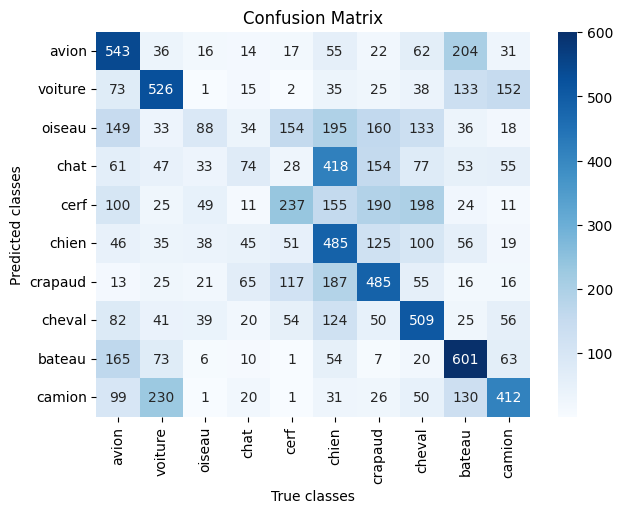

In [19]:
#predictions on test set
pred = np.argmax(fnn_refmodel.predict(data_test), axis=1)

conf_matrix = confusion_matrix(target_test, pred)

#plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.ylabel('Predicted classes')
plt.xlabel('True classes')
plt.title('Confusion Matrix')
plt.show()

In [20]:
indx_prefer = np.argmax(np.sum(conf_matrix, axis=0))
preferred_pred = classes[indx_prefer]
print("The preferred prediction of the model:", preferred_pred)

indx_best = np.argmax(np.diag(conf_matrix))
best_pred_class = classes[indx_best]
print("The best predicted class:", best_pred_class)

The preferred prediction of the model: chien
The best predicted class: bateau


## Partie III. Réseaux de neurones convolutionnels (*CNN*)


Créez un CNN à l'image de *LeNet-5* (LeCun et al., 1998), qui consiste en une double alternance entre une couche convolutionnelle ($m=32$, kernel de $5x5$) et une couche de *Maximum Pooling* (kernel de $2x2$), suivie d'une couche dense ($m=64$).

In [21]:
#Ecrivez votre code ici

#https://www.tensorflow.org/tutorials/images/cnn

m_convu = 32
m_dense = 64

cnn_refmodel = tf.keras.Sequential()
#add couche convoluitonelle (m=32, kernel = 5x5)
cnn_refmodel.add(Conv2D(m_convu, (5, 5), activation='sigmoid', input_shape=(32, 32, 3)))
#add couche de Maximum Pooling
cnn_refmodel.add(MaxPooling2D((2, 2)))
#add couche convoluitonelle (m=32, kernel = 5x5)
cnn_refmodel.add(Conv2D(m_convu, (5, 5), activation='sigmoid', input_shape=(32, 32, 3)))
#add couche de Maximum Pooling
cnn_refmodel.add(MaxPooling2D((2, 2)))
cnn_refmodel.add(Flatten()) #dense layers take vectors as input, so we need to flatten (unroll 3D to 1D)
#follow by dense layer of m=64
cnn_refmodel.add(Dense(m_dense, activation='sigmoid'))
#output layer
cnn_refmodel.add(Dense(len(classes), activation='sigmoid'))

cnn_refmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history1 = cnn_refmodel.fit(data_train, target_train, epochs=20, 
                    validation_data=(data_test, target_test), batch_size=64)

Epoch 1/20


c:\Users\Ratanakmuny\anaconda3\envs\tf_gpu_env\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


782/782 [==============================] - 6s 5ms/step - loss: 2.0292 - accuracy: 0.2490 - val_loss: 1.7968 - val_accuracy: 0.3631
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 1.6823 - accuracy: 0.3938 - val_loss: 1.5875 - val_accuracy: 0.4291
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 1.5072 - accuracy: 0.4550 - val_loss: 1.4448 - val_accuracy: 0.4741
Epoch 4/20
782/782 [==============================] - 3s 4ms/step - loss: 1.4168 - accuracy: 0.4888 - val_loss: 1.3595 - val_accuracy: 0.5135
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 1.3574 - accuracy: 0.5123 - val_loss: 1.3691 - val_accuracy: 0.5091
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 1.3115 - accuracy: 0.5294 - val_loss: 1.3170 - val_accuracy: 0.5270
Epoch 7/20
782/782 [==============================] - 3s 4ms/step - loss: 1.2696 - accuracy: 0.5462 - val_loss: 1.2651 - val_accuracy: 0.5430
Epoch 8/20
782/78


* III.1) Combien de paramètres arrivent-ils en entrée de la couche dense ?
* III.2) Combien de paramètres sont-ils entraînés au total ?
* III.3) Quelle est la performance d'apprentissage et de validation ?

## Response:

In [22]:
#Ecrivez votre code ici
print(cnn_refmodel.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_13 (Flatten)        (None, 800)               0         
                                                                 
 dense_28 (Dense)            (None, 64)              

In [23]:
print("III.1. The number of parameters input to the Dense Layer: From the summary table, we can see that the Flatten's output is an array of size", cnn_refmodel.layers[4].output_shape[1], ". \n\tIt means that the first dense layer consisrs of", cnn_refmodel.layers[4].output_shape[1],"parameters.")

III.1. The number of parameters input to the Dense Layer: From the summary table, we can see that the Flatten's output is an array of size 800 . 
	It means that the first dense layer consisrs of 800 parameters.


In [24]:
print("III.2. As we can see from the summary table, the total parameters is ", cnn_refmodel.count_params())

III.2. As we can see from the summary table, the total parameters is  79978


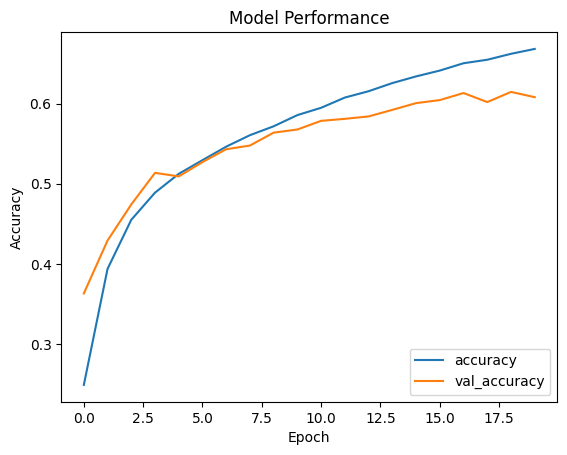

In [25]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Model Performance")
plt.legend(loc='lower right')

In [26]:
train_perf = cnn_refmodel.evaluate(data_train, target_train)
test_perf = cnn_refmodel.evaluate(data_test, target_test)

cnn_acc = train_perf[1]
cnn_val_acc = test_perf[1]

print("The loss on training set:", train_perf[0])
print("The accuracy on training set:", train_perf[1])
print("The loss on testing set:", test_perf[0])
print("The accuracy on testing set:", test_perf[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.1097 - accuracy: 0.6079
The loss on training set: 0.9525371193885803
The accuracy on training set: 0.6651999950408936
The loss on testing set: 1.1097021102905273
The accuracy on testing set: 0.6079000234603882


## Partie IV. Transfer learning

Avec l'immense progression récente du Deep Learning, il est souvent plus intéressant de créer un modèle à partir d'un autre modèle déjà entraîné et l'ajuster (*fine-tune*) selon la tâche spécifique que l'on veut réaliser. Actuellement un large catalogue de modèles très complexes entraînés sur des bases de données de très grande taille est à disposition du public général.   

Commençons par créer un réseau type *ResNet-18* (He et al., 2015) pré-entraîné sur la base de données *ImageNet*

In [46]:
#import torch 
from tensorflow.keras.applications import ResNet50

#resnet = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True) 

ResNet50_model = ResNet50(
    include_top=False, 
    weights='imagenet', 
    input_shape= (32, 32, 3),
    pooling='avg')

tl_cnn = Sequential()
tl_cnn.add(ResNet50_model)
tl_cnn.add(Flatten())
tl_cnn.add(Dense(10, activation='softmax'))
tl_cnn.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_16 (Flatten)        (None, 2048)              0         
                                                                 
 dense_42 (Dense)            (None, 10)                20490     
                                                                 
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________


Maintenant on ajuste le modèle pré-entraîné à notre problème spécifique (*fine-tuning*) 
(Il est préférable d'utiliser un GPU. Par exemple, Google Colab, Codesphere, Gradient by Paperspace, Kaggle, proposent des GPU gratuitement)

In [47]:
tl_cnn.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history4 = tl_cnn.fit(data_train, target_train, epochs=20, validation_data=(data_test, target_test))

Epoch 1/20


c:\Users\Ratanakmuny\anaconda3\envs\tf_gpu_env\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 75s 45ms/step - loss: 1.5566 - accuracy: 0.5233 - val_loss: 2.7633 - val_accuracy: 0.1895
Epoch 2/20
1563/1563 [==============================] - 68s 43ms/step - loss: 2.0173 - accuracy: 0.3413 - val_loss: 1.8633 - val_accuracy: 0.4331
Epoch 3/20
1563/1563 [==============================] - 68s 43ms/step - loss: 1.7084 - accuracy: 0.4483 - val_loss: 1.4426 - val_accuracy: 0.4966
Epoch 4/20
1563/1563 [==============================] - 68s 44ms/step - loss: 1.4487 - accuracy: 0.5281 - val_loss: 1.4524 - val_accuracy: 0.4922
Epoch 5/20
1563/1563 [==============================] - 68s 44ms/step - loss: 1.4563 - accuracy: 0.5383 - val_loss: 2.0495 - val_accuracy: 0.4026
Epoch 6/20
1563/1563 [==============================] - 67s 43ms/step - loss: 1.3405 - accuracy: 0.5738 - val_loss: 2.8076 - val_accuracy: 0.3903
Epoch 7/20
1563/1563 [==============================] - 68s 43ms/step - loss: 1.2174 - accuracy: 0.5971 - val_loss: 1.0613 - val_accura

In [48]:
train_perf = tl_cnn.evaluate(data_train, target_train)
test_perf = tl_cnn.evaluate(data_test, target_test)

tl_cnn_acc = train_perf[1]
tl_cnn_val_acc = test_perf[1]

print("The loss on training set:", train_perf[0])
print("The accuracy on training set:", train_perf[1])
print("The loss on testing set:", test_perf[0])
print("The accuracy on testing set:", test_perf[1])

313/313 [==============================] - 4s 13ms/step - loss: 1.0755 - accuracy: 0.7176
The loss on training set: 0.3416097164154053
The accuracy on training set: 0.8811200261116028
The loss on testing set: 1.075467824935913
The accuracy on testing set: 0.7175999879837036


Remplissez le tableau ci-dessous selon les différentes méthodes de classification testées.

| Classifieur        | Perf Apprentissage | Perf Test | 
|--------------------|--------------------|-----------|
| *FNN* simple       |  |  |  
| *FNN* profond      |  |  | 
| *CNN*              |  |  | 
| *ResNet50*         |  |  | 

* IV.1) Quel est le meilleur classifieur ? Justifiez


In [49]:
import pandas as pd

# Creating a DataFrame to hold the data
data = {
    "Classifieur": ["FNN simple", "FNN profond", "CNN", "ResNet50"],
    "Perf Apprentissage": [fnn_simple_acc, fnn_profond_acc, cnn_acc, tl_cnn_acc],
    "Perf Test": [fnn_simple_val_acc, fnn_profond_val_acc, cnn_val_acc, tl_cnn_val_acc]
}

df = pd.DataFrame(data)

# Display the table
print("Table of Classifier Performances:")
print(df)

# Determine the best classifier based on test performance
best_classifier = df.loc[df['Perf Test'].idxmax()]
print("\nBest Classifier:")
print(best_classifier)


Table of Classifier Performances:
   Classifieur  Perf Apprentissage  Perf Test
0   FNN simple             0.40358     0.3832
1  FNN profond             0.41574     0.3960
2          CNN             0.66520     0.6079
3     ResNet50             0.88112     0.7176

Best Classifier:
Classifieur           ResNet50
Perf Apprentissage     0.88112
Perf Test               0.7176
Name: 3, dtype: object


IV.2) Pendant quelques années les modèles ResNet ont été le *silver standard* dans la classification d'images. Plus récemment, une autre famille de modèles appelée *ConvNet* (Liu et al., 2022) a montré des meilleures performances. Refaite l'expérience précédente en partant d'un modèle *ConvNet* pré-entraîné. 
(Il est préférable d'utiliser un GPU. Par exemple, Google Colab, Codesphere, Gradient by Paperspace, Kaggle, proposent des GPU gratuitement)  

In [62]:
#Ecrivez votre code ici
from tensorflow.keras.applications import ConvNeXtLarge

base_model = ConvNeXtLarge(
    weights='imagenet',
    include_top=False,
    input_shape=(32, 32, 3),
    pooling='avg')
base_model.trainable = False  # Freeze the layers

ConvNet = Sequential()
ConvNet.add(base_model)
ConvNet.add(Flatten())
ConvNet.add(Dense(10, activation='softmax')) # Adjust the number of units according to the number of classes
ConvNet.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convnext_large (Functional)  (None, 1536)             196230336 
                                                                 
 flatten_18 (Flatten)        (None, 1536)              0         
                                                                 
 dense_48 (Dense)            (None, 10)                15370     
                                                                 
Total params: 196,245,706
Trainable params: 15,370
Non-trainable params: 196,230,336
_________________________________________________________________


In [65]:
ConvNet.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history5 = ConvNet.fit(data_train, target_train, epochs=20, validation_data=(data_test, target_test), batch_size=64)

Epoch 1/20
782/782 [==============================] - 83s 91ms/step - loss: 0.4663 - accuracy: 0.8385 - val_loss: 0.4865 - val_accuracy: 0.8312
Epoch 2/20
782/782 [==============================] - 65s 83ms/step - loss: 0.4187 - accuracy: 0.8536 - val_loss: 0.4956 - val_accuracy: 0.8301
Epoch 3/20
782/782 [==============================] - 64s 82ms/step - loss: 0.3948 - accuracy: 0.8622 - val_loss: 0.4972 - val_accuracy: 0.8311
Epoch 4/20
782/782 [==============================] - 63s 81ms/step - loss: 0.3802 - accuracy: 0.8671 - val_loss: 0.4883 - val_accuracy: 0.8367
Epoch 5/20
782/782 [==============================] - 63s 81ms/step - loss: 0.3686 - accuracy: 0.8700 - val_loss: 0.4912 - val_accuracy: 0.8339
Epoch 6/20
782/782 [==============================] - 63s 81ms/step - loss: 0.3613 - accuracy: 0.8726 - val_loss: 0.4962 - val_accuracy: 0.8366
Epoch 7/20
782/782 [==============================] - 63s 81ms/step - loss: 0.3526 - accuracy: 0.8753 - val_loss: 0.5046 - val_accuracy:

In [66]:
train_perf = ConvNet.evaluate(data_train, target_train)
test_perf = ConvNet.evaluate(data_test, target_test)

ConvNeXt_acc = train_perf[1]
ConvNeXt_val_acc = test_perf[1]

print("The loss on training set:", train_perf[0])
print("The accuracy on training set:", train_perf[1])
print("The loss on testing set:", test_perf[0])
print("The accuracy on testing set:", test_perf[1])

313/313 [==============================] - 22s 70ms/step - loss: 0.5462 - accuracy: 0.8287
The loss on training set: 0.28325241804122925
The accuracy on training set: 0.898859977722168
The loss on testing set: 0.546211302280426
The accuracy on testing set: 0.8287000060081482


**Respone:**

We already know that using the function built in is not fit with our dataset because the dataset's shape is 32,32,3 and the input's shape of this ConvNeXt function by default need to be 224,224,3. It is imposible for us to run on our own machine.

After change the input of the model **ConvNeXtLarge** to 32,32,3 the result that we received is not better like what we expected plus it is not consistance overtime. So in order to have a good experienment, we have to build our own ConvNeXt based on the same architecture but only need 32,32,3 to be an input of the model.

## Create our own ConvNeXt using ConvNet 2020s Architecture

### Experienment 1:

ConvNeXt v1 is a straightforward implementation of the ConvNeXt architecture. It incorporates basic elements of convolutional layers, layer normalization, and activation functions, but lacks residual connections.

* ConvNeXt Block in v1 consists of:
    * Depthwise Convolution: This operation applies a separate convolutional filter to each input channel. It reduces the number of parameters and computational cost compared to a standard convolution.
    * Layer Normalization: This normalizes the inputs across the features, stabilizing the learning process and improving convergence.
    * GELU Activation: The Gaussian Error Linear Unit (GELU) activation function introduces non-linearity. It is known for its smooth curve, which can lead to better performance compared to traditional ReLU.
    * Pointwise Convolution: Also known as 1x1 convolution, this operation adjusts the number of output channels, allowing for more flexibility in the model architecture.

* Model Structure in v1 includes:
    * Initial ConvNeXt Block: The model starts with an initial ConvNeXt block with a filter size of 64.
    * Intermediate ConvNeXt Blocks: The model then applies another ConvNeXt block with an increased filter size of 128.
    * MaxPooling Layers: These layers reduce the spatial dimensions of the feature maps, thereby reducing computational complexity and helping the model learn hierarchical features.
    * Further ConvNeXt Blocks: The model continues with ConvNeXt blocks with filter sizes of 256 and 512, interspersed with MaxPooling layers.
    * Global Average Pooling: This layer averages the spatial dimensions, resulting in a single vector per feature map. It reduces the spatial dimensions to one, effectively summarizing the feature maps.
    * Dense Layers: These fully connected layers are used for classification. The first dense layer uses the GELU activation function, followed by another dense layer with softmax activation to output probabilities for each class.

In [53]:
from keras import models, layers
from keras.layers import LayerNormalization, Activation, GlobalAveragePooling2D


# Define a ConvNeXt block
def convnext_block(x, filters, kernel_size=3, stride=1, groups=1):
    # Depthwise Convolution
    x = Conv2D(filters, kernel_size, strides=stride, padding='same', groups=groups)(x)
    # Layer Normalization
    x = LayerNormalization()(x)
    # GELU Activation
    x = Activation('gelu')(x)
    # Pointwise Convolution
    x = Conv2D(filters, 1)(x)
    return x

# Build the ConvNeXt model
def build_convnext(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = convnext_block(inputs, 64, 3)
    x = convnext_block(x, 128, 3)
    x = MaxPooling2D((2, 2))(x)
    x = convnext_block(x, 256, 3)
    x = MaxPooling2D((2, 2))(x)
    x = convnext_block(x, 512, 3)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='gelu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    
    model = models.Model(inputs, x)
    return model

# Set input shape and number of classes
input_shape = (32, 32, 3)
num_classes = 10

# Instantiate and compile the model
ConvNeXt_model = build_convnext(input_shape, num_classes)
ConvNeXt_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_78 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 layer_normalization_37 (Lay  (None, 32, 32, 64)       128       
 erNormalization)                                                
                                                                 
 activation_32 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_79 (Conv2D)          (None, 32, 32, 64)        4160      
                                                                 
 conv2d_80 (Conv2D)          (None, 32, 32, 128)       73856     
                                                           

In [54]:
ConvNeXt_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history6 = ConvNeXt_model.fit(data_train, target_train, epochs=20, 
                    validation_data=(data_test, target_test), batch_size=64)

Epoch 1/20
782/782 [==============================] - 36s 44ms/step - loss: 1.7905 - accuracy: 0.3181 - val_loss: 1.4256 - val_accuracy: 0.4757
Epoch 2/20
782/782 [==============================] - 34s 43ms/step - loss: 1.1828 - accuracy: 0.5689 - val_loss: 1.0423 - val_accuracy: 0.6206
Epoch 3/20
782/782 [==============================] - 34s 43ms/step - loss: 0.9720 - accuracy: 0.6510 - val_loss: 0.9213 - val_accuracy: 0.6639
Epoch 4/20
782/782 [==============================] - 34s 43ms/step - loss: 0.8298 - accuracy: 0.7036 - val_loss: 0.8813 - val_accuracy: 0.6890
Epoch 5/20
782/782 [==============================] - 34s 43ms/step - loss: 0.7161 - accuracy: 0.7469 - val_loss: 0.8719 - val_accuracy: 0.6983
Epoch 6/20
782/782 [==============================] - 34s 43ms/step - loss: 0.6161 - accuracy: 0.7834 - val_loss: 0.6322 - val_accuracy: 0.7769
Epoch 7/20
782/782 [==============================] - 34s 43ms/step - loss: 0.5207 - accuracy: 0.8177 - val_loss: 0.6545 - val_accuracy:

In [68]:
# Evaluate the model
train_perf = ConvNeXt_model.evaluate(data_train, target_train)
test_perf = ConvNeXt_model.evaluate(data_test, target_test)

my_ConvNeXt_acc = train_perf[1]
my_ConvNeXt_val_acc = test_perf[1]

print("The loss on training set:", train_perf[0])
print("The accuracy on training set:", train_perf[1])
print("The loss on testing set:", test_perf[0])
print("The accuracy on testing set:", test_perf[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.8645 - accuracy: 0.8093
The loss on training set: 0.08811302483081818
The accuracy on training set: 0.9682199954986572
The loss on testing set: 0.8645282983779907
The accuracy on testing set: 0.8093000054359436


### Experienment 2

ConvNeXt v2 introduces residual connections and dimension matching to improve the model's performance and stability. Residual connections help mitigate the vanishing gradient problem and enable the training of deeper networks.

* Enhanced ConvNeXt Block in v2 includes:
    * Residual Connection: This adds the input (residual) to the output of the block, ensuring that the network can learn identity mappings. This helps in training deeper networks and improves gradient flow.
    * Dimension Matching: When the dimensions of the input and output do not match, a 1x1 convolution is applied to the input (residual) to ensure the shapes are compatible before addition. This ensures that the residual connection can be added without shape mismatches.
The other components (depthwise convolution, layer normalization, GELU activation, and pointwise convolution) remain the same as in v1.

* Model Structure in v2 includes:
    * Initial ConvNeXt Block: Similar to v1, the model starts with an initial ConvNeXt block with a filter size of 64.
    * First Stage with Residual Blocks: After the initial block, the model includes a stage with multiple ConvNeXt blocks, each having a filter size of 128 and residual connections. This stage is followed by a MaxPooling layer.
    * Second Stage with Residual Blocks: The second stage includes more ConvNeXt blocks with an increased filter size of 256. This stage also ends with a MaxPooling layer.
    * Third Stage with Residual Blocks: The third stage consists of ConvNeXt blocks with a filter size of 512 and residual connections, followed by a MaxPooling layer.
    * Global Average Pooling: Similar to v1, this layer averages the spatial dimensions of the feature maps.
    * Dense Layers: The final dense layers are the same as in v1, with a GELU activation followed by a softmax activation for classification.

In [56]:
# Define a ConvNeXt block with residual connection and dimension matching
def convnext_block_V2(x, filters, kernel_size=3, stride=1, groups=1):
    residual = x
    
    # Depthwise Convolution
    x = Conv2D(filters, kernel_size, strides=stride, padding='same', groups=groups)(x)
    # Layer Normalization
    x = LayerNormalization(epsilon=1e-6)(x)
    # GELU Activation
    x = Activation('gelu')(x)
    # Pointwise Convolution
    x = Conv2D(filters, 1)(x)
    
    # Match dimensions using 1x1 convolution if needed
    if residual.shape[-1] != filters:
        residual = Conv2D(filters, 1)(residual)
    
    x = Add()([x, residual])
    return x

# Build the ConvNeXt model
def build_convnext_V2(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    # Initial ConvNeXt block
    x = convnext_block_V2(inputs, 64, 3)
    x = convnext_block_V2(x, 128, 3)
    # First Max Pooling
    x = MaxPooling2D((2, 2))(x)
    
    # Second Stage
    for _ in range(2):
        x = convnext_block_V2(x, 128, 3)
    
    # Second Max Pooling
    x = MaxPooling2D((2, 2))(x)
    
    # Third Stage
    for _ in range(2):
        x = convnext_block_V2(x, 256, 3)
    
    # Third Max Pooling
    x = MaxPooling2D((2, 2))(x)
    
    # Fourth Stage
    for _ in range(2):
        x = convnext_block_V2(x, 512, 3)
    
    # Global Average Pooling and Dense Layers
    x = GlobalAveragePooling2D()(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dense(256, activation='gelu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    
    model = models.Model(inputs, x)
    return model

# Set input shape and number of classes
input_shape = (32, 32, 3)
num_classes = 10
ConvNeXt_model_V2 = build_convnext_V2(input_shape, num_classes)
ConvNeXt_model_V2.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_86 (Conv2D)             (None, 32, 32, 64)   1792        ['input_11[0][0]']               
                                                                                                  
 layer_normalization_41 (LayerN  (None, 32, 32, 64)  128         ['conv2d_86[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_36 (Activation)     (None, 32, 32, 64)   0           ['layer_normalization_41[0]

In [57]:
# Train the model
ConvNeXt_model_V2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history7 = ConvNeXt_model_V2.fit(data_train, target_train, epochs=20, validation_data=(data_test, target_test),batch_size=64)

Epoch 1/20
782/782 [==============================] - 56s 68ms/step - loss: 1.7093 - accuracy: 0.3656 - val_loss: 1.3819 - val_accuracy: 0.4869
Epoch 2/20
782/782 [==============================] - 52s 66ms/step - loss: 1.2212 - accuracy: 0.5533 - val_loss: 1.0783 - val_accuracy: 0.6074
Epoch 3/20
782/782 [==============================] - 50s 64ms/step - loss: 0.9595 - accuracy: 0.6531 - val_loss: 0.9330 - val_accuracy: 0.6642
Epoch 4/20
782/782 [==============================] - 50s 64ms/step - loss: 0.8049 - accuracy: 0.7134 - val_loss: 0.8388 - val_accuracy: 0.7048
Epoch 5/20
782/782 [==============================] - 50s 64ms/step - loss: 0.6879 - accuracy: 0.7573 - val_loss: 0.7527 - val_accuracy: 0.7347
Epoch 6/20
782/782 [==============================] - 50s 64ms/step - loss: 0.5809 - accuracy: 0.7970 - val_loss: 0.7099 - val_accuracy: 0.7556
Epoch 7/20
782/782 [==============================] - 50s 64ms/step - loss: 0.4895 - accuracy: 0.8277 - val_loss: 0.6943 - val_accuracy:

In [58]:
# Evaluate the model
train_perf = ConvNeXt_model_V2.evaluate(data_train, target_train)
test_perf = ConvNeXt_model_V2.evaluate(data_test, target_test)

my_ConvNeXt2_acc = train_perf[1]
my_ConvNeXt2_acc = test_perf[1]

print("The loss on training set:", train_perf[0])
print("The accuracy on training set:", train_perf[1])
print("The loss on testing set:", test_perf[0])
print("The accuracy on testing set:", test_perf[1])

313/313 [==============================] - 4s 13ms/step - loss: 1.0284 - accuracy: 0.7931
The loss on training set: 0.052612073719501495
The accuracy on training set: 0.9818999767303467
The loss on testing set: 1.0284076929092407
The accuracy on testing set: 0.7930999994277954


### Conclusion:

* ConvNeXt v1 is simpler, focusing on the core elements of the ConvNeXt architecture but without residual connections.
* ConvNeXt v2 builds on v1 by adding residual connections and ensuring dimension compatibility, making it more robust and capable of deeper learning.

Reference to this research : 
* ConvNeXt: https://arxiv.org/pdf/2201.03545
* Vision Transformers (ViTs): https://arxiv.org/pdf/2010.11929
* Gaussian Error Linear Units (GELU): https://arxiv.org/pdf/1606.08415
* Layer Normalization: https://arxiv.org/pdf/1607.06450

## Performance

In [67]:
# Creating a DataFrame to hold the data
data = {
    "Classifieur": ["FNN simple", "FNN profond", "CNN", "ResNet50", "ConvNeXt default", "ConvNeXt V1", "ConvNeXt V2"],
    "Perf Apprentissage": [fnn_simple_acc, fnn_profond_acc, cnn_acc, tl_cnn_acc, ConvNeXt_acc, my_ConvNeXt_acc, my_ConvNeXt2_acc],
    "Perf Test": [fnn_simple_val_acc, fnn_profond_val_acc, cnn_val_acc, tl_cnn_val_acc, ConvNeXt_val_acc, my_ConvNeXt_val_acc, my_ConvNeXt2_val_acc]
}

df = pd.DataFrame(data)

# Display the table
print("Table of Classifier Performances:")
print(df)

# Determine the best classifier based on test performance
best_classifier = df.loc[df['Perf Test'].idxmax()]
print("\nBest Classifier:")
print(best_classifier)

Table of Classifier Performances:
        Classifieur  Perf Apprentissage  Perf Test
0        FNN simple             0.40358     0.3832
1       FNN profond             0.41574     0.3960
2               CNN             0.66520     0.6079
3          ResNet50             0.88112     0.7176
4  ConvNeXt default             0.89886     0.8287
5       ConvNeXt V1             0.96822     0.8093
6       ConvNeXt V2             0.79310     0.7867

Best Classifier:
Classifieur           ConvNeXt default
Perf Apprentissage             0.89886
Perf Test                       0.8287
Name: 4, dtype: object


We can see that ConvNeXt is the best among the rest. However, sometimes ConvNeXt default is better than our both ConvNeXt but sometimes our both model are better than ConvNeXt default.

This experience taught us a lot in terms of understanding new architecture, testing and analysis the different of the model when they have different architecture.